<a href="https://colab.research.google.com/github/zzackkk/iris/blob/main/iris_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X = iris.data
Y = iris.target

data = pd.DataFrame(X,columns=iris.feature_names)
data["Species"] = Y
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.shape

(150, 5)

In [ ]:
data["Species"].unique()

array([0, 1, 2])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: ylabel='count'>

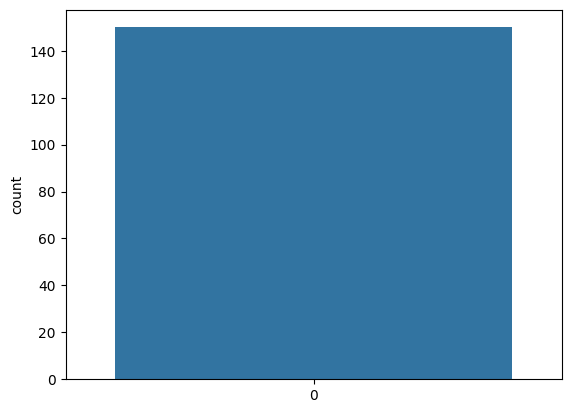

In [ ]:
sns.countplot(data["Species"])

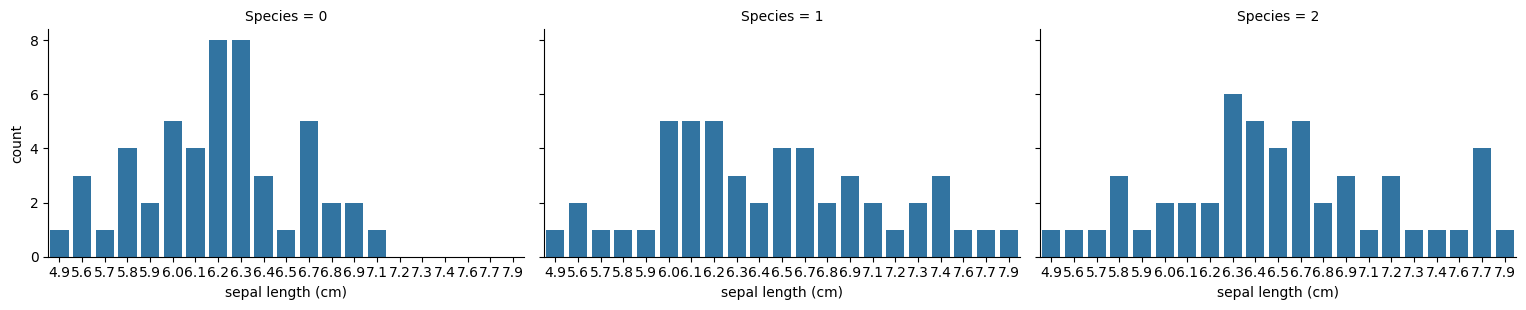

In [ ]:
grid = sns.FacetGrid(data, col='Species', height= 3.2, aspect=1.6)
grid.map(sns.countplot,'sepal length (cm)')

In [ ]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state=42)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(135, 4)
(135,)
(15, 4)
(15,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {

    "Logistic_Regression": LogisticRegression(random_state=42),
    "SVC":SVC(kernel ='rbf', gamma=0.5, probability=True),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=1, random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(max_depth=1,n_estimators=3, learning_rate=1.0)

    
}

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
def loss(Y_true, y_pred, retur=False):
 pre = precision_score(Y_true, y_pred, average='macro')
 rec = recall_score(Y_true, y_pred, average='macro')
 accuracy = accuracy_score(Y_true, y_pred)


 if retur:
   return pre, rec, accuracy
 else:
     print(pre)
     print(rec)
     print(accuracy)

In [ ]:
def train_and_eval(models, X,Y):
  for name, model in models.items():
    print('name' ':' )
    model.fit(X,Y)
    loss(Y, model.predict(X))
    print('*' * 30)


In [ ]:
train_and_eval(models,X_train, Y_train)

name:
0.98
0.9772727272727272
0.9777777777777777
******************************
name:
0.98
0.9772727272727272
0.9777777777777777
******************************
name:
0.5054945054945055
0.6666666666666666
0.674074074074074
******************************
name:
0.9716553287981861
0.9701805286911669
0.9703703703703703
******************************


In [ ]:
gra = GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state = 42)
gra.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=3,
                           random_state=42)

In [ ]:
gra.predict([[1.2,1.5,1.6,1.2]])

array([0])

In [ ]:
import joblib
joblib.dump(gra, 'model.pk1')
grad = joblib.load('model.pk1')